This notebook was used to develop visualizations for the parameter tuning for the LDA model. Coding and visuals can be seen below.
<br><br>
Input: "GME_record.csv", record of various runs of LDA and associated parameters and output metrics. 

In [1]:
#!pip install gensim

import pandas as pd
import numpy as np
import os
import timeit
import pickle
import matplotlib.pyplot as plt
import seaborn
import re

In [2]:
df = pd.read_csv("GME_record.csv")
#df[(df["max_feat"] == 10000)]
#type(df.loc[0]["ngram_range"])
#df[(df["ngram_range"] == '(1, 3)') & (df["max_feat"] == 20000)]
df.num_features.unique()

array([ 8818, 10000,  2000,  5000, 20000])

In [3]:
df_1 = df[(df["ngram_range"] == '(1, 1)') & (df["max_feat"] == 2000)]
df_1 = df_1.sort_values('n_components')

df_2 = df[(df["ngram_range"] == '(1, 2)') & (df["max_feat"] == 2000)]
df_2 = df_2.sort_values('n_components')

df_3 = df[(df["ngram_range"] == '(1, 3)') & (df["max_feat"] == 2000)]
df_3 = df_3.sort_values('n_components')

df_4 = df[(df["ngram_range"] == '(1, 1)') & (df["max_feat"] == 5000)]
df_4 = df_4.sort_values('n_components')

df_5 = df[(df["ngram_range"] == '(1, 2)') & (df["max_feat"] == 5000)]
df_5 = df_5.sort_values('n_components')

df_6 = df[(df["ngram_range"] == '(1, 3)') & (df["max_feat"] == 5000)]
df_6 = df_6.sort_values('n_components')

df_7 = df[(df["ngram_range"] == '(1, 1)') & (df["max_feat"] == 10000)]
df_7 = df_7.sort_values('n_components')

df_8 = df[(df["ngram_range"] == '(1, 2)') & (df["max_feat"] == 10000)]
df_8 = df_8.sort_values('n_components')

df_9 = df[(df["ngram_range"] == '(1, 3)') & (df["max_feat"] == 10000)]
df_9 = df_9.sort_values('n_components')

df_10 = df[(df["ngram_range"] == '(1, 2)') & (df["max_feat"] == 20000)]
df_10 = df_10.sort_values('n_components')

df_11 = df[(df["ngram_range"] == '(1, 3)') & (df["max_feat"] == 20000)]
df_11 = df_11.sort_values('n_components')

# Plotting Perplexity

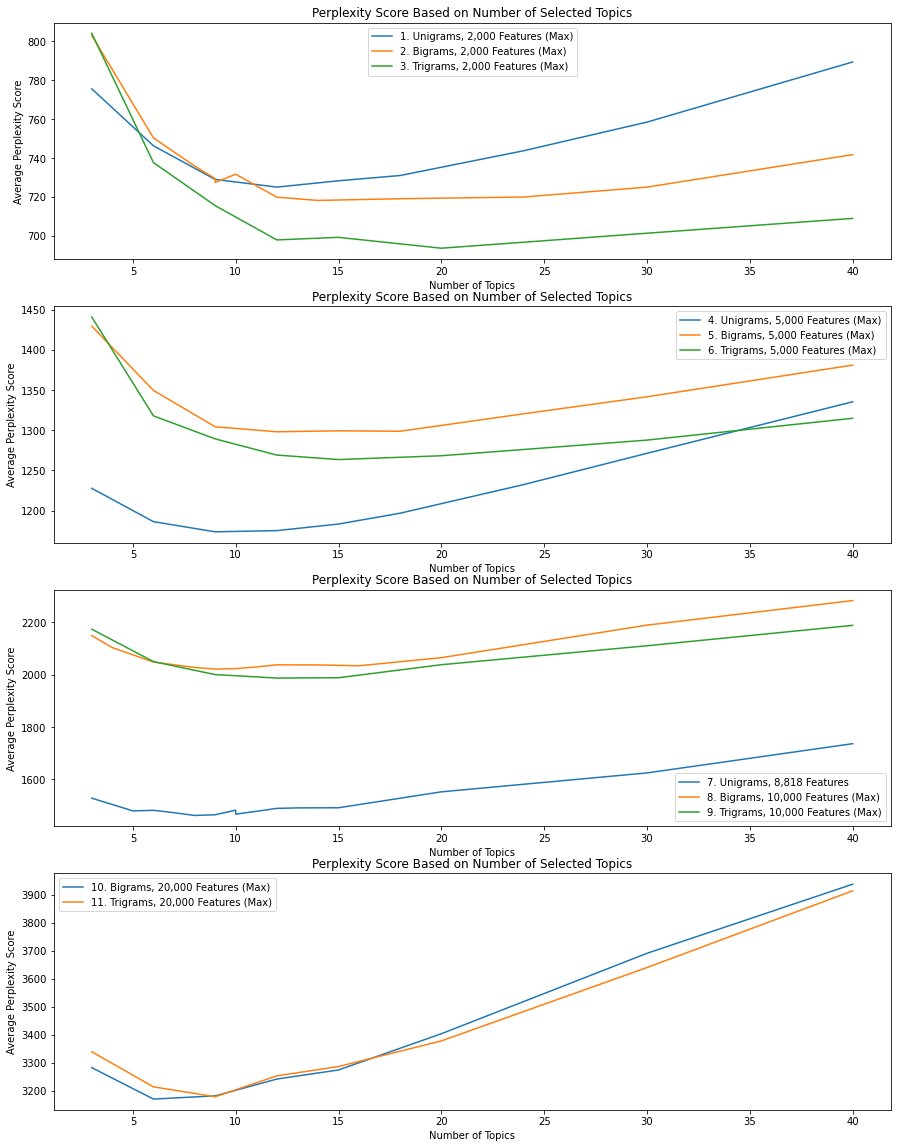

In [4]:
fig, ax = plt.subplots(4, 1, figsize = (15, 20))
ax[0].plot(df_1['n_components'], df_1['perplexity'], label = "1. Unigrams, 2,000 Features (Max)")
ax[0].plot(df_2['n_components'], df_2['perplexity'], label = "2. Bigrams, 2,000 Features (Max)")
ax[0].plot(df_3['n_components'], df_3['perplexity'], label = "3. Trigrams, 2,000 Features (Max)")
ax[1].plot(df_4['n_components'], df_4['perplexity'], label = "4. Unigrams, 5,000 Features (Max)")
ax[1].plot(df_5['n_components'], df_5['perplexity'], label = "5. Bigrams, 5,000 Features (Max)")
ax[1].plot(df_6['n_components'], df_6['perplexity'], label = "6. Trigrams, 5,000 Features (Max)")
ax[2].plot(df_7['n_components'], df_7['perplexity'], label = "7. Unigrams, 8,818 Features")
ax[2].plot(df_8['n_components'], df_8['perplexity'], label = "8. Bigrams, 10,000 Features (Max)")
ax[2].plot(df_9['n_components'], df_9['perplexity'], label = "9. Trigrams, 10,000 Features (Max)")
ax[3].plot(df_10['n_components'], df_10['perplexity'], label = "10. Bigrams, 20,000 Features (Max)")
ax[3].plot(df_11['n_components'], df_11['perplexity'], label = "11. Trigrams, 20,000 Features (Max)")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[0].set_title('Perplexity Score Based on Number of Selected Topics')
ax[1].set_title('Perplexity Score Based on Number of Selected Topics')
ax[2].set_title('Perplexity Score Based on Number of Selected Topics')
ax[3].set_title('Perplexity Score Based on Number of Selected Topics')
ax[0].set_ylabel("Average Perplexity Score")
ax[1].set_ylabel("Average Perplexity Score")
ax[2].set_ylabel("Average Perplexity Score")
ax[3].set_ylabel("Average Perplexity Score")
ax[0].set_xlabel("Number of Topics")
ax[1].set_xlabel("Number of Topics")
ax[2].set_xlabel("Number of Topics")
ax[3].set_xlabel("Number of Topics")
plt.show()

# Plotting Coherence

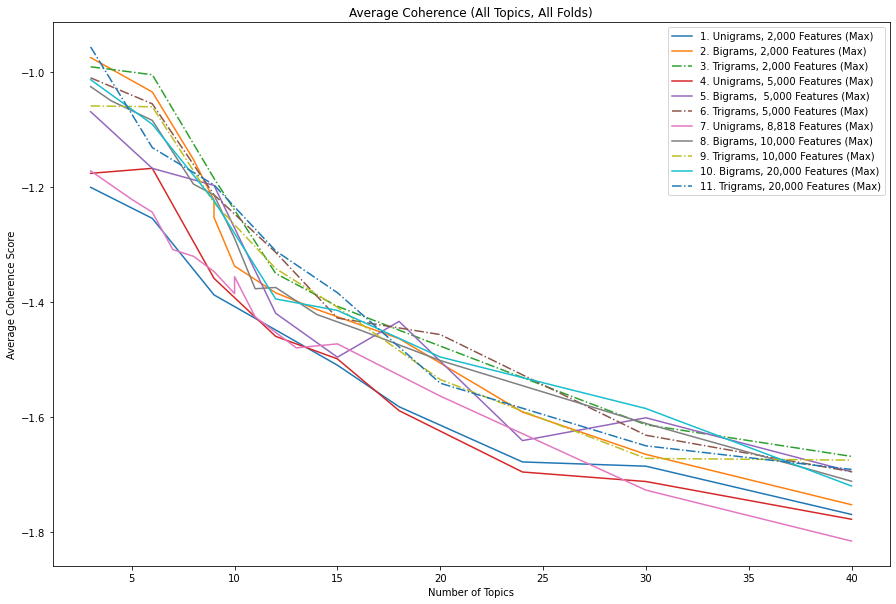

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot(df_1['n_components'], df_1['coherence'], label = "1. Unigrams, 2,000 Features (Max)")
ax.plot(df_2['n_components'], df_2['coherence'], label = "2. Bigrams, 2,000 Features (Max)")
ax.plot(df_3['n_components'], df_3['coherence'], label = "3. Trigrams, 2,000 Features (Max)", linestyle = '-.')
ax.plot(df_4['n_components'], df_4['coherence'], label = "4. Unigrams, 5,000 Features (Max)")
ax.plot(df_5['n_components'], df_5['coherence'], label = "5. Bigrams,  5,000 Features (Max)")
ax.plot(df_6['n_components'], df_6['coherence'], label = "6. Trigrams, 5,000 Features (Max)", linestyle = '-.')
ax.plot(df_7['n_components'], df_7['coherence'], label = "7. Unigrams, 8,818 Features (Max)")
ax.plot(df_8['n_components'], df_8['coherence'], label = "8. Bigrams, 10,000 Features (Max)")
ax.plot(df_9['n_components'], df_9['coherence'], label = "9. Trigrams, 10,000 Features (Max)", linestyle = '-.')
ax.plot(df_10['n_components'], df_10['coherence'], label = "10. Bigrams, 20,000 Features (Max)")
ax.plot(df_11['n_components'], df_11['coherence'], label = "11. Trigrams, 20,000 Features (Max)", linestyle = '-.')
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Average Coherence (All Topics, All Folds)')
ax.set_ylabel("Average Coherence Score")
ax.set_xlabel("Number of Topics")
plt.show()
plt.show()

# Exploring Coherence

In [6]:
df[(df["ngram_range"] == '(1, 2)') & (df["max_feat"] == 2000)]

,run_num,max_feat,min_df,max_df,ngram_range,n_components,random_state,top_terms,coherence_type,num_features,coherence,perplexity,cohe_folds,perp_folds
24,8,2000,25,0.9,"(1, 2)",6,NaN,10,u_mass,2000,-1.035177,750.311512,"[(-1.1632173816054254, [-2.006406492291752, -0...","[728.7255068886053, 745.2355912901969, 761.762..."
25,8,2000,25,0.9,"(1, 2)",8,NaN,10,u_mass,2000,-1.152495,735.828450,"[(-1.1226085213194823, [-1.0393267841256693, -...","[723.8169176487035, 740.5606853208654, 734.012..."
26,8,2000,25,0.9,"(1, 2)",9,NaN,10,u_mass,2000,-1.223078,729.344579,"[(-1.1953553346076355, [-0.14349406063737927, ...","[719.6818828963193, 729.3347365747204, 737.170..."
27,8,2000,25,0.9,"(1, 2)",10,NaN,10,u_mass,2000,-1.337780,731.583254,"[(-1.293622298065887, [-0.32232287008556937, -...","[722.1599406250618, 727.9266466675074, 729.088..."
28,9,2000,25,0.9,"(1, 2)",9,NaN,10,u_mass,2000,-1.253184,727.357614,"[(-1.1901086141685067, [-1.493297702337564, -1...","[713.9472793211384, 731.1989047369079, 731.337..."
29,9,2000,25,0.9,"(1, 2)",12,NaN,10,u_mass,2000,-1.384186,719.775519,"[(-1.5210345345587377, [-0.7289564659842998, -...","[707.862968490371, 727.175715225526, 716.46807..."
30,9,2000,25,0.9,"(1, 2)",14,NaN,10,u_mass,2000,-1.413202,718.093745,"[(-1.4696245165613728, [-1.4480722092439733, -...","[711.8256819446835, 718.1666341455452, 722.939..."
31,10,2000,25,0.9,"(1, 2)",18,NaN,10,u_mass,2000,-1.463701,718.970317,"[(-1.3837455362052147, [-0.6486649155626932, -...","[715.6085186305, 727.3703444133257, 726.573815..."
32,10,2000,25,0.9,"(1, 2)",24,NaN,10,u_mass,2000,-1.591431,719.841777,"[(-1.62803629929523, [-2.0939388217737664, -2....","[727.737022544713, 731.1894368849918, 730.5092..."
33,10,2000,25,0.9,"(1, 2)",30,NaN,10,u_mass,2000,-1.665014,724.944089,"[(-1.7162050377593088, [-0.7469384819055274, -...","[736.1062709566303, 730.2913653777074, 735.208..."


In [7]:
###CONVERTS THE TEXT STRING OF THE COHERENCE SCORE IN THE SAVEFILE BACK TO LIST/TUPLE FORMATS
def convert_to_floats(cohe_str):
    s = re.findall(pattern = "[\(][^\)]*[\)]", string = cohe_str)
    return_list = []
    for m in s:
        nums = re.findall("[-]\d[.]\d*", string = m)
        #print(m)
        new = []
        avg = float(nums[0])
        for num in nums[1:]:
            n = float(num)
            new.append(n)
        #print("Float list: ", new, "\n")
        return_list.append((avg, new))
    return return_list  

###RETURNS A DICTIONARY OF THE TOP 3 TOPICS FOR EACH TRIAL, ALONG WITH AVERAGES
def get_top_3(list_of_cohe_fold_scores):

    overall_tot = 0
    top_3_tot = 0
    one_tot = 0
    two_tot = 0
    three_tot = 0
    remainder = 0
    for fold in list_of_cohe_fold_scores:
        #print("FOLD: ", fold)
        overall_tot = overall_tot + fold[0]
        #print(fold[1])
        top_3 = np.array(fold[1])
        top_3.sort()
        top_3 = top_3[::-1]
        #print(top_3, "\n")
        one_tot = one_tot + top_3[0]
        two_tot = two_tot + top_3[1]
        three_tot = three_tot + top_3[2]
        try:
            remainder = remainder + top_3[3:].mean()
        except:
            remainder = np.isnan()
    overall_avg = overall_tot/5
    top_3_avg = (one_tot + two_tot + three_tot)/15
    one_avg = one_tot/5
    two_avg = two_tot/5
    three_avg = three_tot/5
    remainder_avg = remainder/5
    return {'overall_avg': overall_avg, 'top_3_avg': top_3_avg, 
            'one_avg': one_avg, 'two_avg': two_avg, 
            'three_avg': three_avg, "remainder_avg": remainder_avg}


###USES ABOVE TWO DEFINITIONS TO GET RELEVANT COHERENCE STATS FOR EACH TRIAL.
###RETURNS A DATAFRAME OF ALL INPUTTED TRIALS WITH SCORES FOR TOP 3 TOPICS, AS WELL AS AVERAGES. 
def get_coherence_stats(df):
    df_return = pd.DataFrame(columns =['max_feat', 'ngram_range', 'n_components', 
                                       'overall_avg', 'top_3_avg', 'one_avg', 
                                       'two_avg', 'three_avg', 'remainder_avg'])
    for i in range(len(df)):
        floats = convert_to_floats(df['cohe_folds'].iloc[i])
        cohe_summary = get_top_3(floats)
        sum_dict = {'max_feat': df['max_feat'].iloc[i], 
                    'ngram_range': df['ngram_range'].iloc[i], 
                    'n_components': df['n_components'].iloc[i]}
        sum_dict.update(cohe_summary)
        df_return = df_return.append(sum_dict, ignore_index = True)
    return df_return
    


In [8]:
cohe_stats = get_coherence_stats(df)
cohe_stats

,max_feat,ngram_range,n_components,overall_avg,top_3_avg,one_avg,two_avg,three_avg,remainder_avg
0,10000,"(1, 1)",3,-1.172181,-1.172181,-1.040459,-1.195180,-1.280905,NaN
1,10000,"(1, 1)",10,-1.385576,-0.901083,-0.646014,-1.006507,-1.050727,-1.593217
2,10000,"(1, 1)",20,-1.563672,-0.893114,-0.558392,-0.991277,-1.129672,-1.682005
3,10000,"(1, 1)",30,-1.727125,-0.843830,-0.557183,-0.924333,-1.049973,-1.825268
4,10000,"(1, 1)",40,-1.815742,-0.865918,-0.561814,-0.964160,-1.071781,-1.892755
...,...,...,...,...,...,...,...,...,...
102,5000,"(1, 3)",12,-1.313875,-0.547541,-0.285659,-0.524607,-0.832358,-1.569320
103,5000,"(1, 3)",15,-1.428041,-0.588133,-0.241088,-0.608582,-0.914728,-1.638018
104,5000,"(1, 3)",20,-1.456773,-0.473190,-0.227828,-0.483234,-0.708507,-1.630346
105,5000,"(1, 3)",30,-1.631729,-0.425668,-0.216268,-0.474787,-0.585949,-1.765735


In [9]:
stats1 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 1)') & (cohe_stats["max_feat"] == 2000)]
stats1 = stats1.sort_values('n_components')

stats2 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 2)') & (cohe_stats["max_feat"] == 2000)]
stats2 = stats2.sort_values('n_components')

stats3 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 3)') & (cohe_stats["max_feat"] == 2000)]
stats3 = stats3.sort_values('n_components')

stats4 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 1)') & (cohe_stats["max_feat"] == 5000)]
stats4 = stats4.sort_values('n_components')

stats5 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 2)') & (cohe_stats["max_feat"] == 5000)]
stats5 = stats5.sort_values('n_components')

stats6 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 3)') & (cohe_stats["max_feat"] == 5000)]
stats6 = stats6.sort_values('n_components')

stats7 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 1)') & (cohe_stats["max_feat"] == 10000)]
stats7 = stats7.sort_values('n_components')

stats8 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 2)') & (cohe_stats["max_feat"] == 10000)]
stats8 = stats8.sort_values('n_components')

stats9 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 3)') & (cohe_stats["max_feat"] == 10000)]
stats9 = stats9.sort_values('n_components')

stats10 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 2)') & (cohe_stats["max_feat"] == 20000)]
stats10 = stats10.sort_values('n_components')

stats11 = cohe_stats[(cohe_stats["ngram_range"] == '(1, 3)') & (cohe_stats["max_feat"] == 20000)]
stats11 = stats11.sort_values('n_components')

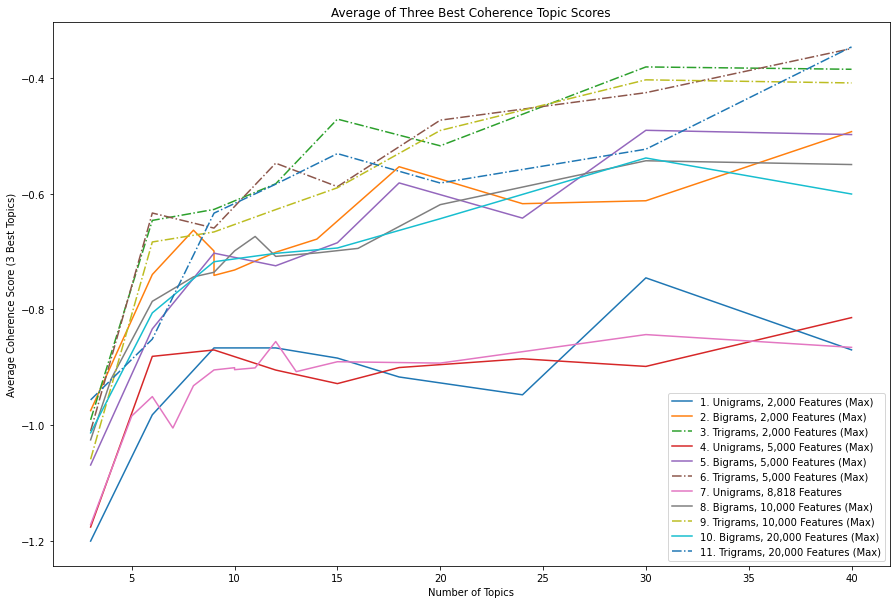

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot(stats1['n_components'], stats1['top_3_avg'], label = "1. Unigrams, 2,000 Features (Max)")
ax.plot(stats2['n_components'], stats2['top_3_avg'], label = "2. Bigrams, 2,000 Features (Max)")
ax.plot(stats3['n_components'], stats3['top_3_avg'], label = "3. Trigrams, 2,000 Features (Max)", linestyle = '-.')

ax.plot(stats4['n_components'], stats4['top_3_avg'], label = "4. Unigrams, 5,000 Features (Max)")
ax.plot(stats5['n_components'], stats5['top_3_avg'], label = "5. Bigrams, 5,000 Features (Max)")
ax.plot(stats6['n_components'], stats6['top_3_avg'], label = "6. Trigrams, 5,000 Features (Max)", linestyle = '-.')

ax.plot(stats7['n_components'], stats7['top_3_avg'], label = "7. Unigrams, 8,818 Features")
ax.plot(stats8['n_components'], stats8['top_3_avg'], label = "8. Bigrams, 10,000 Features (Max)")
ax.plot(stats9['n_components'], stats9['top_3_avg'], label = "9. Trigrams, 10,000 Features (Max)", linestyle = '-.')

ax.plot(stats10['n_components'], stats10['top_3_avg'], label = "10. Bigrams, 20,000 Features (Max)")
ax.plot(stats11['n_components'], stats11['top_3_avg'], label = "11. Trigrams, 20,000 Features (Max)", linestyle = '-.')
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Average of Three Best Coherence Topic Scores')
ax.set_ylabel("Average Coherence Score (3 Best Topics)")
ax.set_xlabel("Number of Topics")
plt.show()

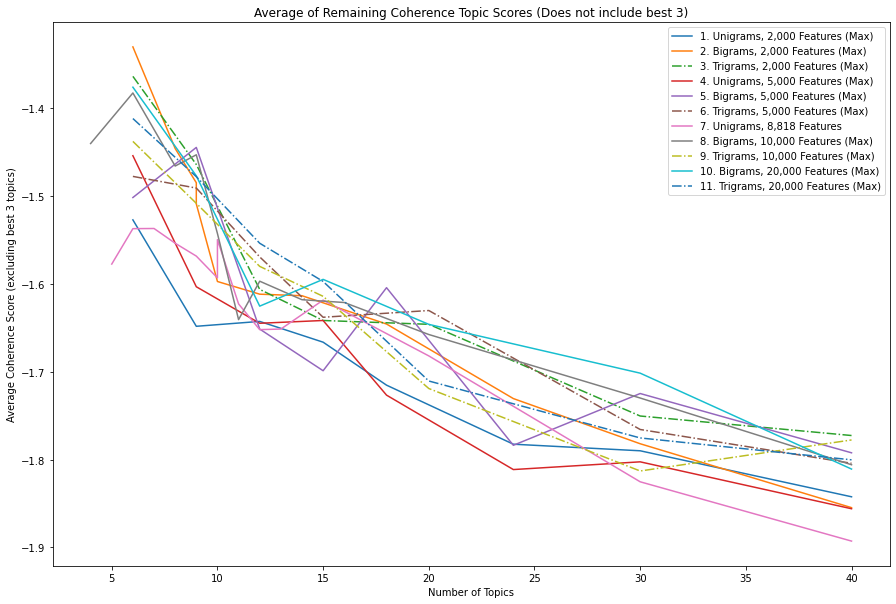

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot(stats1['n_components'], stats1['remainder_avg'], label = "1. Unigrams, 2,000 Features (Max)")
ax.plot(stats2['n_components'], stats2['remainder_avg'], label = "2. Bigrams, 2,000 Features (Max)")
ax.plot(stats3['n_components'], stats3['remainder_avg'], label = "3. Trigrams, 2,000 Features (Max)", linestyle = '-.')

ax.plot(stats4['n_components'], stats4['remainder_avg'], label = "4. Unigrams, 5,000 Features (Max)")
ax.plot(stats5['n_components'], stats5['remainder_avg'], label = "5. Bigrams, 5,000 Features (Max)")
ax.plot(stats6['n_components'], stats6['remainder_avg'], label = "6. Trigrams, 5,000 Features (Max)", linestyle = '-.')

ax.plot(stats7['n_components'], stats7['remainder_avg'], label = "7. Unigrams, 8,818 Features")
ax.plot(stats8['n_components'], stats8['remainder_avg'], label = "8. Bigrams, 10,000 Features (Max)")
ax.plot(stats9['n_components'], stats9['remainder_avg'], label = "9. Trigrams, 10,000 Features (Max)", linestyle = '-.')

ax.plot(stats10['n_components'], stats10['remainder_avg'], label = "10. Bigrams, 20,000 Features (Max)")
ax.plot(stats11['n_components'], stats11['remainder_avg'], label = "11. Trigrams, 20,000 Features (Max)", linestyle = '-.')
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Average of Remaining Coherence Topic Scores (Does not include best 3)')
ax.set_ylabel("Average Coherence Score (excluding best 3 topics)")
ax.set_xlabel("Number of Topics")
plt.show()

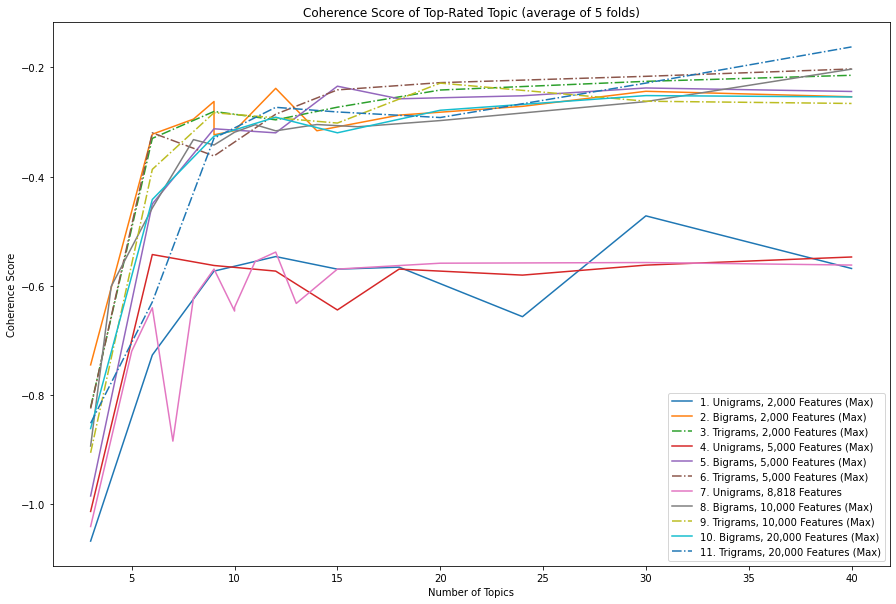

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot(stats1['n_components'], stats1['one_avg'], label = "1. Unigrams, 2,000 Features (Max)")
ax.plot(stats2['n_components'], stats2['one_avg'], label = "2. Bigrams, 2,000 Features (Max)")
ax.plot(stats3['n_components'], stats3['one_avg'], label = "3. Trigrams, 2,000 Features (Max)", linestyle = '-.')

ax.plot(stats4['n_components'], stats4['one_avg'], label = "4. Unigrams, 5,000 Features (Max)")
ax.plot(stats5['n_components'], stats5['one_avg'], label = "5. Bigrams, 5,000 Features (Max)")
ax.plot(stats6['n_components'], stats6['one_avg'], label = "6. Trigrams, 5,000 Features (Max)", linestyle = '-.')

ax.plot(stats7['n_components'], stats7['one_avg'], label = "7. Unigrams, 8,818 Features")
ax.plot(stats8['n_components'], stats8['one_avg'], label = "8. Bigrams, 10,000 Features (Max)")
ax.plot(stats9['n_components'], stats9['one_avg'], label = "9. Trigrams, 10,000 Features (Max)", linestyle = '-.')

ax.plot(stats10['n_components'], stats10['one_avg'], label = "10. Bigrams, 20,000 Features (Max)")
ax.plot(stats11['n_components'], stats11['one_avg'], label = "11. Trigrams, 20,000 Features (Max)", linestyle = '-.')
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Coherence Score of Top-Rated Topic (average of 5 folds)')
ax.set_ylabel("Coherence Score")
ax.set_xlabel("Number of Topics")
plt.show()

# Plots for Report

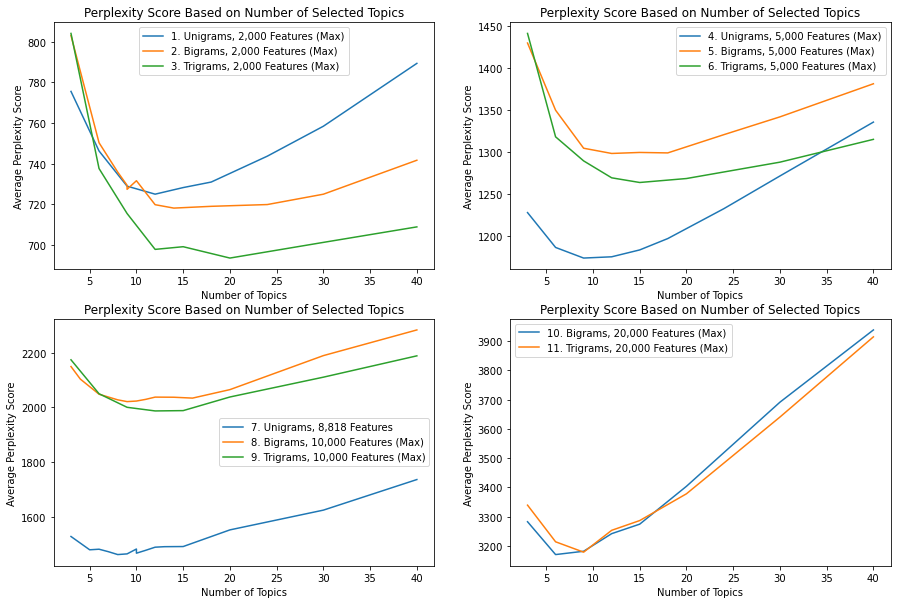

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].plot(df_1['n_components'], df_1['perplexity'], label = "1. Unigrams, 2,000 Features (Max)")
ax[0][0].plot(df_2['n_components'], df_2['perplexity'], label = "2. Bigrams, 2,000 Features (Max)")
ax[0][0].plot(df_3['n_components'], df_3['perplexity'], label = "3. Trigrams, 2,000 Features (Max)")
ax[0][1].plot(df_4['n_components'], df_4['perplexity'], label = "4. Unigrams, 5,000 Features (Max)")
ax[0][1].plot(df_5['n_components'], df_5['perplexity'], label = "5. Bigrams, 5,000 Features (Max)")
ax[0][1].plot(df_6['n_components'], df_6['perplexity'], label = "6. Trigrams, 5,000 Features (Max)")
ax[1][0].plot(df_7['n_components'], df_7['perplexity'], label = "7. Unigrams, 8,818 Features")
ax[1][0].plot(df_8['n_components'], df_8['perplexity'], label = "8. Bigrams, 10,000 Features (Max)")
ax[1][0].plot(df_9['n_components'], df_9['perplexity'], label = "9. Trigrams, 10,000 Features (Max)")
ax[1][1].plot(df_10['n_components'], df_10['perplexity'], label = "10. Bigrams, 20,000 Features (Max)")
ax[1][1].plot(df_11['n_components'], df_11['perplexity'], label = "11. Trigrams, 20,000 Features (Max)")
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[0][0].set_title('Perplexity Score Based on Number of Selected Topics')
ax[0][1].set_title('Perplexity Score Based on Number of Selected Topics')
ax[1][0].set_title('Perplexity Score Based on Number of Selected Topics')
ax[1][1].set_title('Perplexity Score Based on Number of Selected Topics')
ax[0][0].set_ylabel("Average Perplexity Score")
ax[0][1].set_ylabel("Average Perplexity Score")
ax[1][0].set_ylabel("Average Perplexity Score")
ax[1][1].set_ylabel("Average Perplexity Score")
ax[0][0].set_xlabel("Number of Topics")
ax[0][1].set_xlabel("Number of Topics")
ax[1][0].set_xlabel("Number of Topics")
ax[1][1].set_xlabel("Number of Topics")
plt.show()

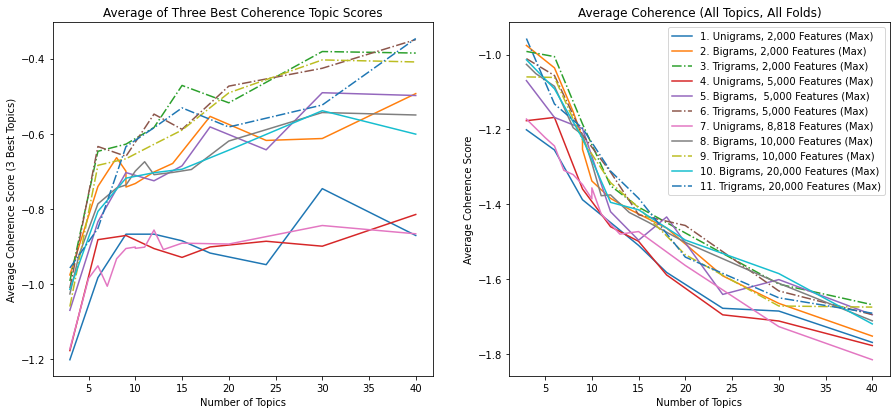

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6.5))
ax[0].plot(stats1['n_components'], stats1['top_3_avg'], label = "1. Unigrams, 2,000 Features (Max)")
ax[0].plot(stats2['n_components'], stats2['top_3_avg'], label = "2. Bigrams, 2,000 Features (Max)")
ax[0].plot(stats3['n_components'], stats3['top_3_avg'], label = "3. Trigrams, 2,000 Features (Max)", linestyle = '-.')

ax[0].plot(stats4['n_components'], stats4['top_3_avg'], label = "4. Unigrams, 5,000 Features (Max)")
ax[0].plot(stats5['n_components'], stats5['top_3_avg'], label = "5. Bigrams, 5,000 Features (Max)")
ax[0].plot(stats6['n_components'], stats6['top_3_avg'], label = "6. Trigrams, 5,000 Features (Max)", linestyle = '-.')

ax[0].plot(stats7['n_components'], stats7['top_3_avg'], label = "7. Unigrams, 8,818 Features")
ax[0].plot(stats8['n_components'], stats8['top_3_avg'], label = "8. Bigrams, 10,000 Features (Max)")
ax[0].plot(stats9['n_components'], stats9['top_3_avg'], label = "9. Trigrams, 10,000 Features (Max)", linestyle = '-.')

ax[0].plot(stats10['n_components'], stats10['top_3_avg'], label = "10. Bigrams, 20,000 Features (Max)")
ax[0].plot(stats11['n_components'], stats11['top_3_avg'], label = "11. Trigrams, 20,000 Features (Max)", linestyle = '-.')
#ax[0].legend()
ax[0].set_title('Average of Three Best Coherence Topic Scores')
ax[0].set_ylabel("Average Coherence Score (3 Best Topics)")
ax[0].set_xlabel("Number of Topics")

ax[1].plot(df_1['n_components'], df_1['coherence'], label = "1. Unigrams, 2,000 Features (Max)")
ax[1].plot(df_2['n_components'], df_2['coherence'], label = "2. Bigrams, 2,000 Features (Max)")
ax[1].plot(df_3['n_components'], df_3['coherence'], label = "3. Trigrams, 2,000 Features (Max)", linestyle = '-.')
ax[1].plot(df_4['n_components'], df_4['coherence'], label = "4. Unigrams, 5,000 Features (Max)")
ax[1].plot(df_5['n_components'], df_5['coherence'], label = "5. Bigrams,  5,000 Features (Max)")
ax[1].plot(df_6['n_components'], df_6['coherence'], label = "6. Trigrams, 5,000 Features (Max)", linestyle = '-.')
ax[1].plot(df_7['n_components'], df_7['coherence'], label = "7. Unigrams, 8,818 Features (Max)")
ax[1].plot(df_8['n_components'], df_8['coherence'], label = "8. Bigrams, 10,000 Features (Max)")
ax[1].plot(df_9['n_components'], df_9['coherence'], label = "9. Trigrams, 10,000 Features (Max)", linestyle = '-.')
ax[1].plot(df_10['n_components'], df_10['coherence'], label = "10. Bigrams, 20,000 Features (Max)")
ax[1].plot(df_11['n_components'], df_11['coherence'], label = "11. Trigrams, 20,000 Features (Max)", linestyle = '-.')
ax[1].legend()
ax[1].set_title('Average Coherence (All Topics, All Folds)')
ax[1].set_ylabel("Average Coherence Score")
ax[1].set_xlabel("Number of Topics")

plt.show()

In [84]:
df_temp = pd.DataFrame(columns = ['run_num', 'max_feat', 'min_df', 'max_df', 'ngram_range',
       'n_components', 'random_state', 'top_terms', 'coherence_type',
       'num_features', 'coherence', 'perplexity', 'cohe_folds', 'perp_folds'])
counter = 0
for num in [2000, 5000, 10000, 20000]:
    for gram in df['ngram_range'].unique():
        df_temp_2 = df[(df['max_feat'] == num) & (df['ngram_range'] == gram)]
        df_temp_2.where(df_temp_2['perplexity'] == df_temp_2['perplexity'].min(), inplace = True)
        df_temp_2.dropna(how = 'all', inplace = True)
        #print(df_temp_2)
        #pd.concat([df_temp, df_temp_2], ignore_index = False)
        df_temp = pd.concat([df_temp, df_temp_2])
df_temp

,run_num,max_feat,min_df,max_df,ngram_range,n_components,random_state,top_terms,coherence_type,num_features,coherence,perplexity,cohe_folds,perp_folds
36,11.0,2000.0,25.0,0.9,"(1, 1)",12.0,NaN,10.0,u_mass,2000.0,-1.448782,724.961994,"[(-1.4429578758286177, [-1.204924340718685, -1...","[707.3717987065681, 720.6116062058325, 732.578..."
30,9.0,2000.0,25.0,0.9,"(1, 2)",14.0,NaN,10.0,u_mass,2000.0,-1.413202,718.093745,"[(-1.4696245165613728, [-1.4480722092439733, -...","[711.8256819446835, 718.1666341455452, 722.939..."
96,28.0,2000.0,25.0,0.9,"(1, 3)",20.0,NaN,10.0,u_mass,2000.0,-1.476754,693.474479,"[(-1.4209914787551141, [-0.321431372519791, -1...","[692.7052622980373, 696.7385981739666, 698.424..."
42,12.0,5000.0,25.0,0.9,"(1, 1)",9.0,NaN,10.0,u_mass,5000.0,-1.358999,1173.642879,"[(-1.2668992362187723, [-1.6271038114440364, -...","[1124.9095045316355, 1144.2076279905048, 1157...."
50,14.0,5000.0,25.0,0.9,"(1, 2)",12.0,NaN,10.0,u_mass,5000.0,-1.419821,1298.052374,"[(-1.384546645438304, [-2.6049319573377785, -1...","[1286.5649077487979, 1286.6384919408097, 1298...."
103,29.0,5000.0,25.0,0.9,"(1, 3)",15.0,NaN,10.0,u_mass,5000.0,-1.428041,1263.523170,"[(-1.3544770449921797, [-0.6017384438101522, -...","[1236.6454153102898, 1265.9256360283305, 1267...."
5,2.0,10000.0,25.0,0.9,"(1, 1)",8.0,NaN,10.0,u_mass,8818.0,-1.320700,1462.675878,"[(-1.3554903209090683, [-1.1485249662482713, -...","[1406.7482394160625, 1427.3518778450332, 1451...."
22,7.0,10000.0,25.0,0.9,"(1, 2)",9.0,NaN,10.0,u_mass,10000.0,-1.214125,2021.509591,"[(-1.1866007026160057, [-0.8140977698945425, -...","[2013.099546250395, 1998.852202849689, 2007.76..."
86,27.0,10000.0,25.0,0.9,"(1, 3)",12.0,NaN,10.0,u_mass,10000.0,-1.342035,1987.445694,"[(-1.3799935213847803, [-1.2273088508577732, -...","[1960.9340915353023, 1974.868113150505, 2021.8..."
57,16.0,20000.0,25.0,0.9,"(1, 2)",6.0,NaN,10.0,u_mass,20000.0,-1.091240,3169.989209,"[(-1.1021561678217102, [-1.7509887469065906, -...","[3126.8089605241985, 3197.3500462509924, 3134...."


In [94]:
# df_temp = pd.merge(df_temp.reset_index(), get_coherence_stats(df_temp)[['overall_avg', 'top_3_avg',
#        'one_avg', 'two_avg', 'three_avg', 'remainder_avg']], right_index = True, left_index = True)
df_temp = df_temp[['max_feat', 'ngram_range',
       'n_components',
       'num_features', 'perplexity', 'coherence',
       'top_3_avg',
       'remainder_avg']]
df_temp.rename(columns = {'max_feat': "Maximum Features Allowed", 
                         'ngram_range': "Largest N-Gram",
                         'n_components': "Number of Topics",
                         'num_features': "Actual Features Included", 
                         'perplexity': 'Avg. Perplexity', 
                         'coherence': "Avg. Coherence",
                         'top_3_avg': "Avg. Coherence - Top 3 Topics", 
                         'remainder_avg': "Avg. Coherence - All Remaining Topics (Besides Top 3)"})

,Maximum Features Allowed,Largest N-Gram,Number of Topics,Actual Features Included,Avg. Perplexity,Avg. Coherence,Avg. Coherence - Top 3 Topics,Avg. Coherence - All Remaining Topics (Besides Top 3)
0,2000.0,"(1, 1)",12.0,2000.0,724.961994,-1.448782,-0.866885,-1.642748
1,2000.0,"(1, 2)",14.0,2000.0,718.093745,-1.413202,-0.678807,-1.613491
2,2000.0,"(1, 3)",20.0,2000.0,693.474479,-1.476754,-0.517521,-1.646030
3,5000.0,"(1, 1)",9.0,5000.0,1173.642879,-1.358999,-0.870413,-1.603292
4,5000.0,"(1, 2)",12.0,5000.0,1298.052374,-1.419821,-0.724915,-1.651457
5,5000.0,"(1, 3)",15.0,5000.0,1263.523170,-1.428041,-0.588133,-1.638018
6,10000.0,"(1, 1)",8.0,8818.0,1462.675878,-1.320700,-0.932260,-1.553764
7,10000.0,"(1, 2)",9.0,10000.0,2021.509591,-1.214125,-0.736156,-1.453109
8,10000.0,"(1, 3)",12.0,10000.0,1987.445694,-1.342035,-0.627803,-1.580112
9,20000.0,"(1, 2)",6.0,20000.0,3169.989209,-1.091240,-0.806299,-1.376180
